In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/archive(1).zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1101.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1102.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1103.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1104.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1105.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1106.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1107.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1108.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/normal_train_1109.jpg  
  inflating: /content/RetinalOCT_Dataset/RetinalOCT_Dataset/train/NORMAL/nor

In [4]:
import keras
import tensorflow as tf
import numpy as np
from keras.src.models import Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, LeakyReLU, GlobalAveragePooling2D, BatchNormalization,Rescaling, RandomFlip, RandomRotation,RandomBrightness
from sklearn.utils.class_weight import compute_class_weight
from keras.src.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.src.regularizers import L2



train_dataset = keras.utils.image_dataset_from_directory(
    "/content/RetinalOCT_Dataset/RetinalOCT_Dataset/train",
    labels="inferred",
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(384, 256),
)

test_dataset = keras.utils.image_dataset_from_directory(
    "/content/RetinalOCT_Dataset/RetinalOCT_Dataset/val",
    labels="inferred",
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(384, 256),
)

Found 18400 files belonging to 8 classes.
Found 2800 files belonging to 8 classes.


In [ ]:
# from keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation, Lambda, Normalization

# def preprocess(image, label):
#     image = tf.cast(image, tf.float32) / 255.0
#     return image, label

# data_augumentation=Sequential([
#     RandomFlip("horizontal"),
#     RandomRotation(factor=2/360),
#     RandomZoom(0.02),
#     RandomTranslation(height_factor=0.02, width_factor=0.02),
# ])

# def augment(image, label):
#     image = tf.cast(image, tf.float32) / 255.0
#     image = data_augumentation(image)
#     return image, label

# train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
# test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)


In [6]:
model = Sequential([

Input(shape=(512, 512, 1)),

Conv2D(32, (7, 7), strides=2, padding='same', activation='relu'),
BatchNormalization(),
MaxPooling2D((3, 3), strides=2),

Conv2D(64, (3, 3), padding='same', activation='relu'),
BatchNormalization(),
Conv2D(64, (3, 3), padding='same', activation='relu'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Dropout(0.3),

Conv2D(128, (3, 3), padding='same', activation='relu'),
BatchNormalization(),
Conv2D(128, (3, 3), padding='same', activation='relu'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Dropout(0.3),

Conv2D(256, (3, 3), padding='same', activation='relu'),
BatchNormalization(),
Conv2D(256, (3, 3), padding='same', activation='relu'),
BatchNormalization(),
GlobalAveragePooling2D(),
Dropout(0.5),

Dense(8, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 256, 256, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 127, 127, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 127, 127, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 127, 127, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 63, 63, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 63, 63, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 63, 63, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 31, 31, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 31, 31, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 31, 31, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 31, 31, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             

 Total params: 1,169,480 (4.46 MB)

 Trainable params: 1,167,624 (4.45 MB)

 Non-trainable params: 1,856 (7.25 KB)

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=13, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Keras/eye_class.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=4, min_lr=1e-12)

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=test_dataset,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/100
575/575 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.5375 - auc: 0.9111 - loss: 1.0719 - val_accuracy: 0.3871 - val_auc: 0.7294 - val_loss: 3.0898 - learning_rate: 0.0010
Epoch 2/100
575/575 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8360 - auc: 0.9854 - loss: 0.4421 - val_accuracy: 0.8039 - val_auc: 0.9778 - val_loss: 0.5399 - learning_rate: 0.0010
Epoch 3/100
575/575 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.8964 - auc: 0.9921 - loss: 0.3030 - val_accuracy: 0.5936 - val_auc: 0.9121 - val_loss: 1.2835 - learning_rate: 0.0010
Epoch 4/100
575/575 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9210 - auc: 0.9951 - loss: 0.2304 - val_accuracy: 0.7689 - val_auc: 0.9691 - val_loss: 0.6829 - learning_rate: 0.0010
Epoch 5/100
575/575 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.9362 - auc: 0.9965 - loss: 0.1897 - val_accuracy: 0.9175 - val_auc: 0.9948 - val_loss: 0.2348 - learning_rate: 0.0010
Epoch 6/100
575/575 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy

Found 2800 files belonging to 8 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━

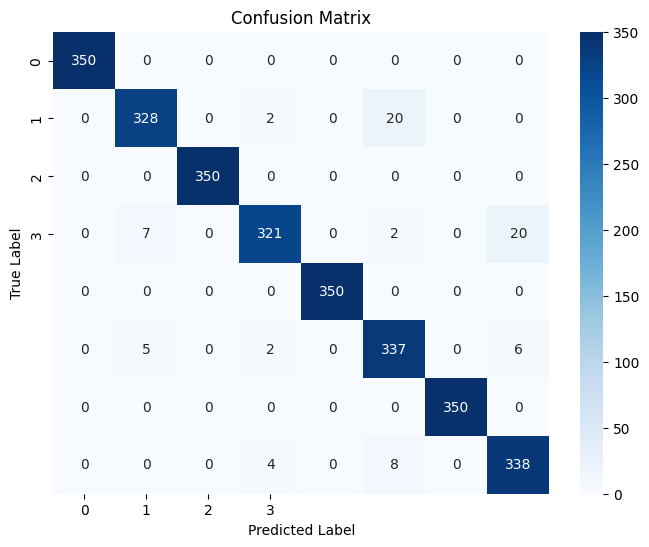

Accuracy: 97.29%


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = []
real_labels = []

test_dataset = keras.utils.image_dataset_from_directory(
    "/content/RetinalOCT_Dataset/RetinalOCT_Dataset/test",
    labels="inferred",
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(384, 256),
)

for images, labels in test_dataset:
    preds = model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    real_labels.extend(np.argmax(labels.numpy(), axis=1))

cm = confusion_matrix(real_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(real_labels, predictions)
print(f"Accuracy: {accuracy:.2%}")